In [ ]:
!pip install efficientnet


In [2]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import os

import efficientnet.keras as efn
# For activation definition
from tensorflow.keras.backend import sigmoid  # Import sigmoid from tensorflow.keras.backend
from keras.layers import Activation
# from keras.utils.generic_utils import get_custom_objects

from keras.preprocessing import image
from sklearn.metrics import accuracy_score


In [4]:
from tensorflow.math import sigmoid


In [5]:
from keras.models import load_model
from keras.layers import Activation
from tensorflow.math import sigmoid
from tensorflow.keras.utils import get_custom_objects
from tensorflow.keras.optimizers import Adam

# Define the custom Swish activation function
class Swish(Activation):
    def __init__(self, activation, **kwargs):
        super(Swish, self).__init__(activation, **kwargs)
        self.__name__ = 'swish'

def swish(x, beta=1):
    return x * sigmoid(beta * x)

# Register the custom activation
get_custom_objects().update({'swish': Swish(swish)})

if __name__ == '__main__':
    # Load the model without compiling (ignore the optimizer)
    model = load_model('/kaggle/input/efficientcovidnet-500/tensorflow2/default/1/EfficientCovidNet-500.hdf5', 
                       custom_objects={'swish': Swish(swish)}, compile=False)

    # Re-compile the model with a new optimizer (set learning rate explicitly)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='your_loss_function')

    # Optionally, you can run predictions here
    # img = np.zeros(shape=(1, 500, 500, 3))
    # prediction = model.predict(img)
    # print(prediction)

In [6]:
# predicting the image
img = np.ones(shape=(1, 500, 500, 3))
prediction = model.predict(img)
print(prediction)

I0000 00:00:1727863432.476145     103 service.cc:145] XLA service 0x7eaf58003260 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1727863432.476197     103 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1727863432.476201     103 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
[[0.27550697 0.72449297]]


I0000 00:00:1727863438.452328     103 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


# Second layer

In [7]:
%%capture

import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [8]:
data_dir = "/kaggle/input/sarscov2-ctscan-dataset"
img_height, img_width = 500, 500
batch_size = 64

In [9]:
# training use batches

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 2481 files belonging to 2 classes.
Using 1985 files for training.
Found 2481 files belonging to 2 classes.
Using 496 files for validation.


In [10]:
class_names = train_ds.class_names
print(class_names)

['COVID', 'non-COVID']


In [2]:
import cv2

<function matplotlib.pyplot.show(close=None, block=None)>

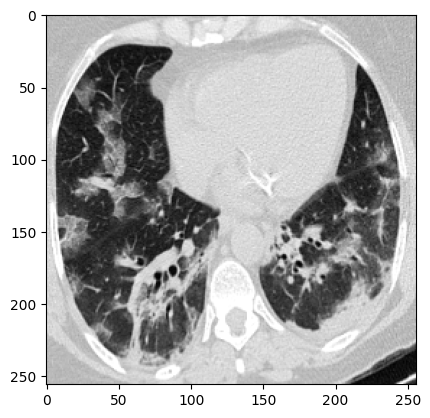

In [7]:
import matplotlib.pyplot as plt
isize=256
def get_img(path):
    img=cv2.imread(path,cv2.IMREAD_GRAYSCALE)
    n_array=cv2.resize(img,(isize,isize))
    return n_array
path=r"/kaggle/input/sarscov2-ctscan-dataset/COVID/Covid (10).png"
img=cv2.imread(path,cv2.IMREAD_GRAYSCALE)
n_array=cv2.resize(img,(isize,isize))
plt.imshow(n_array,cmap="gray")
plt.show 

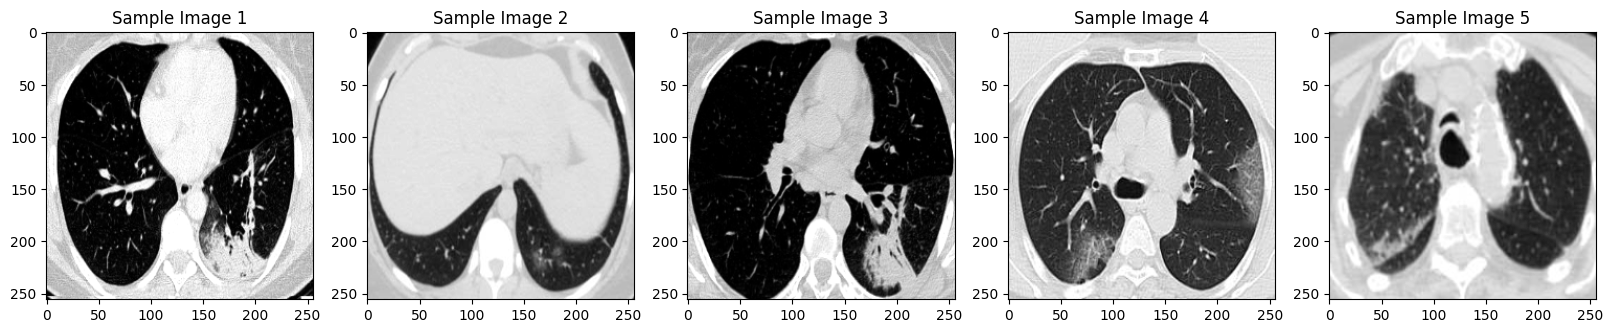

Mean pixel intensities for the sample images:  [167.7533416748047, 202.35763549804688, 137.98866271972656, 163.1636199951172, 178.3077850341797, 145.83474731445312, 188.9373321533203, 173.5813751220703, 151.21682739257812, 159.4926300048828]
Standard deviations of pixel intensities:  [73.80907117801864, 52.37389665617882, 72.02274986456008, 68.4334750732541, 61.614767116297585, 72.02165450863544, 52.11917771469569, 81.64668002613872, 70.87103539012638, 68.43951668782056]


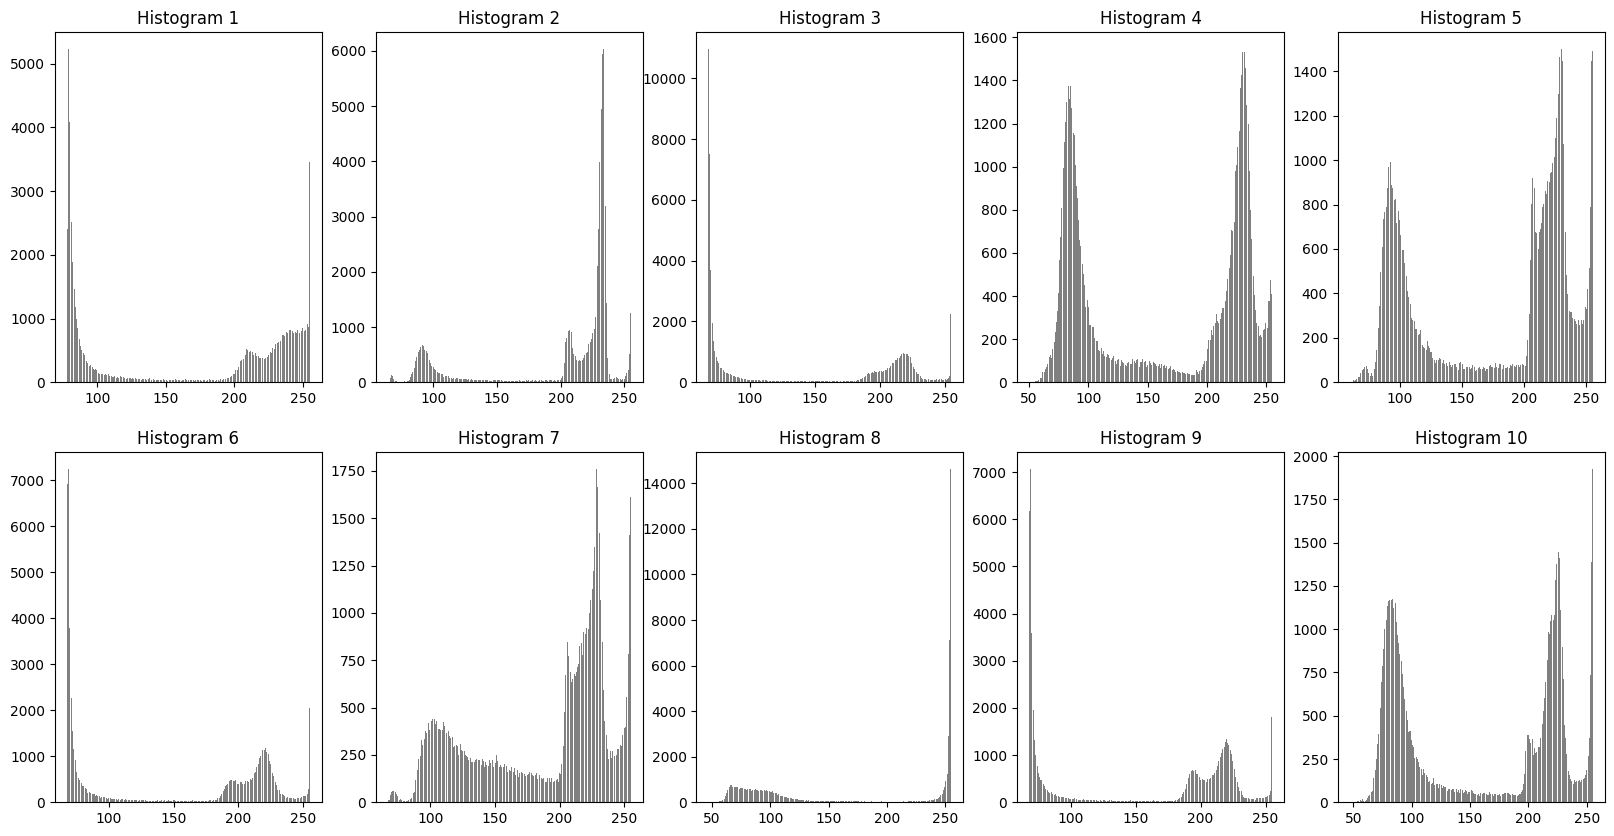

Shapes of the sample images:  [(256, 256), (256, 256), (256, 256), (256, 256), (256, 256), (256, 256), (256, 256), (256, 256), (256, 256), (256, 256)]
Overall mean pixel intensity: 166.86339569091797
Overall variance of pixel intensity: 4964.676235197799


In [8]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

# Define a function to load and preprocess multiple images
def load_images_from_folder(folder, sample_size=10):
    images = []
    image_paths = glob(os.path.join(folder, "*.png"))
    for img_path in image_paths[:sample_size]:
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img_resized = cv2.resize(img, (256, 256))
        images.append(img_resized)
    return images

# Path to your dataset folder (update this accordingly)
dataset_folder = "/kaggle/input/sarscov2-ctscan-dataset/COVID"

# Load a sample of images from the folder
images = load_images_from_folder(dataset_folder, sample_size=10)

# Display a few sample images
fig, axes = plt.subplots(1, 5, figsize=(20, 10))
for i in range(5):
    axes[i].imshow(images[i], cmap='gray')
    axes[i].set_title(f"Sample Image {i+1}")
plt.show()

# Compute mean and standard deviation of pixel intensities
pixel_means = [np.mean(img) for img in images]
pixel_stds = [np.std(img) for img in images]

# Print basic statistics for the sample images
print("Mean pixel intensities for the sample images: ", pixel_means)
print("Standard deviations of pixel intensities: ", pixel_stds)

# Plot histograms of pixel intensities for each sample image
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
for i, img in enumerate(images):
    ax = axes[i//5, i%5]
    ax.hist(img.ravel(), bins=256, color='gray')
    ax.set_title(f"Histogram {i+1}")
plt.show()

# Analyze image shapes (should be uniform, but verifying)
image_shapes = [img.shape for img in images]
print("Shapes of the sample images: ", image_shapes)

# Calculate the overall mean and variance across all images in the sample
overall_mean = np.mean([img for img in images])
overall_variance = np.var([img for img in images])

print(f"Overall mean pixel intensity: {overall_mean}")
print(f"Overall variance of pixel intensity: {overall_variance}")


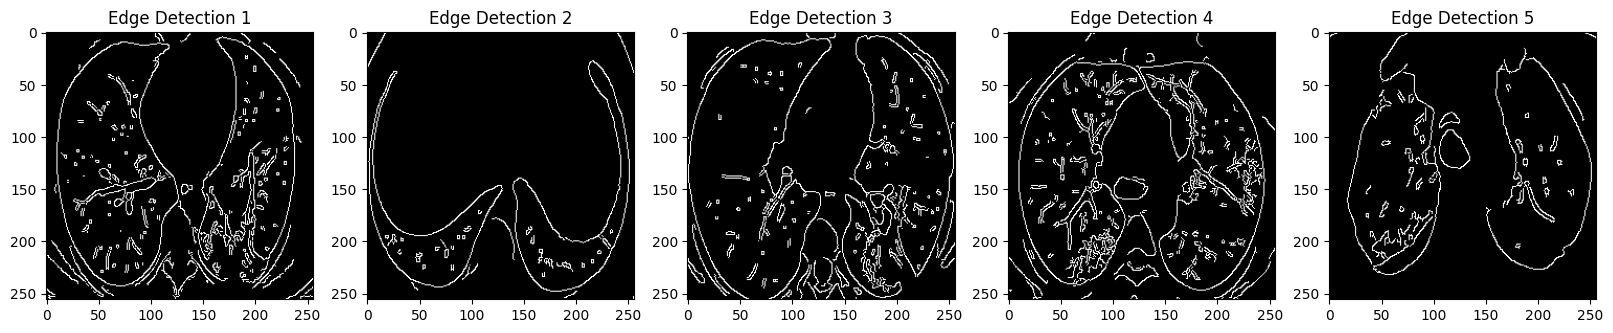

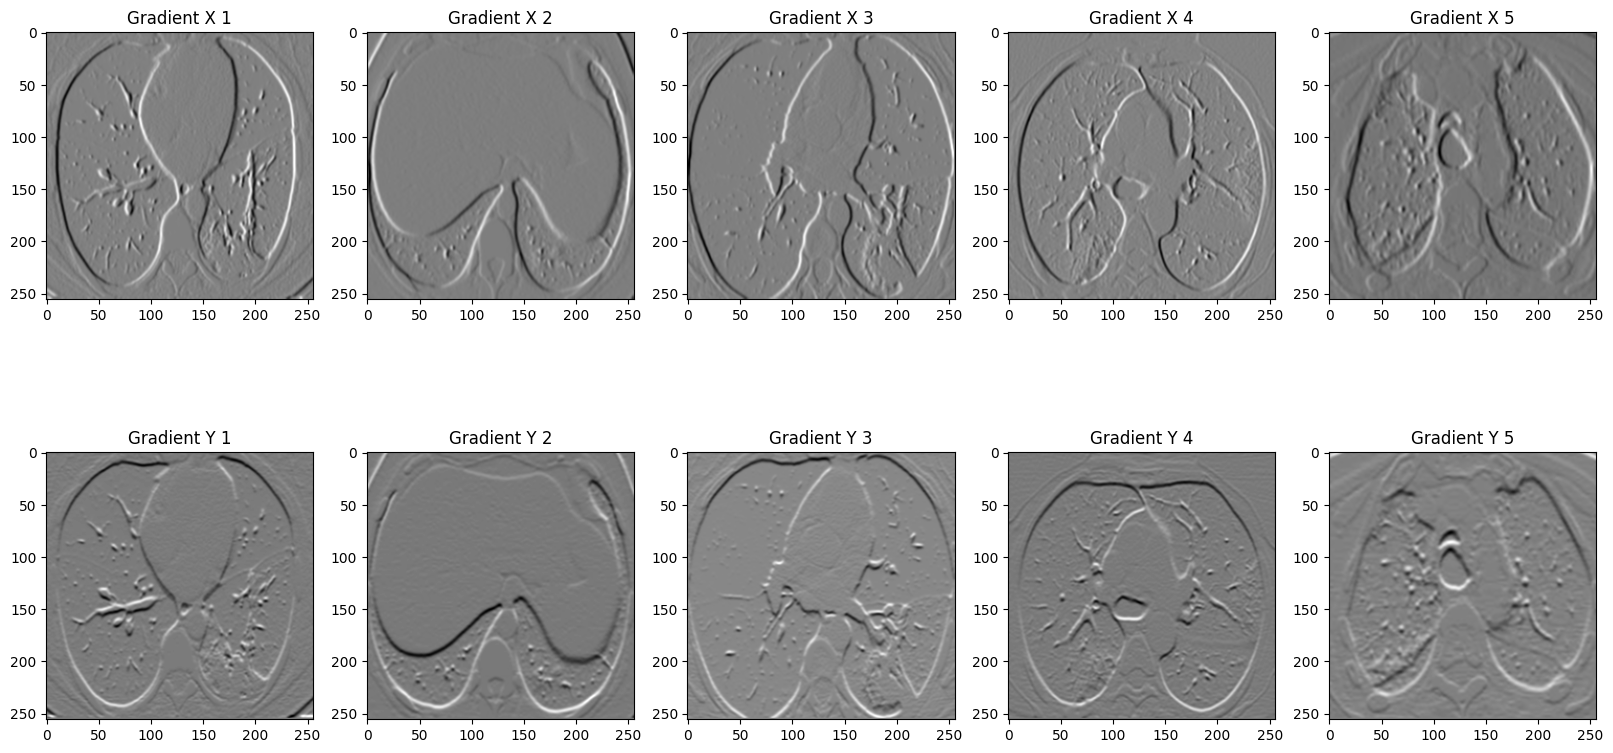

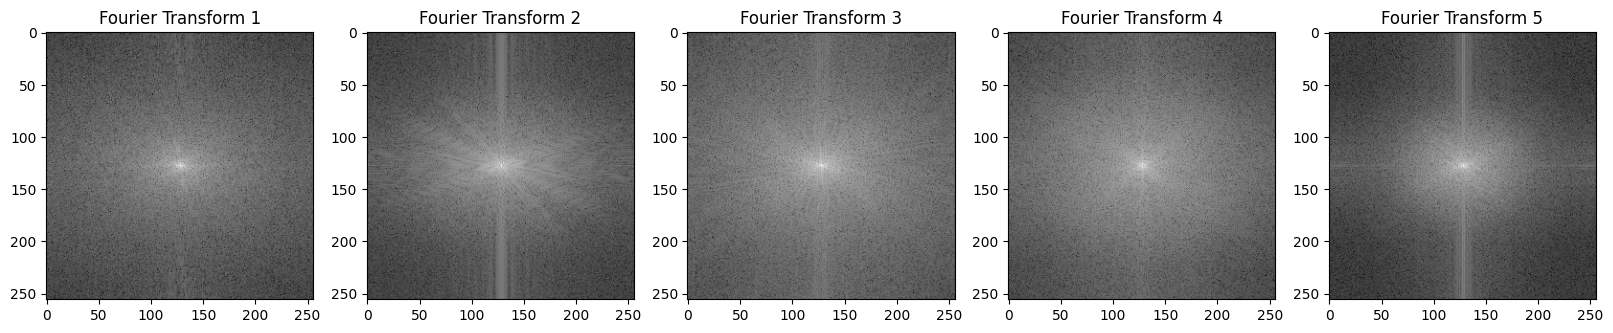

Using n_components=10
PCA Variance Ratio: [2.94434249e-01 1.76153099e-01 1.32893434e-01 9.54926274e-02
 8.67663434e-02 7.44834446e-02 5.29650430e-02 5.03886566e-02
 3.64231040e-02 6.56747711e-31]
Cumulative Variance: [0.29443425 0.47058735 0.60348078 0.69897341 0.78573975 0.8602232
 0.91318824 0.9635769  1.         1.        ]
SSIM between Image 1 and Image 2: 0.2749371272841138
SSIM between Image 2 and Image 3: 0.30898376199043925
SSIM between Image 3 and Image 4: 0.20829089867136966
SSIM between Image 4 and Image 5: 0.25478581659310645


In [11]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import feature
from skimage.metrics import structural_similarity as ssim
from scipy import fftpack
from sklearn.decomposition import PCA

# Load images from the folder (you can reuse the previous load function)
def load_images_from_folder(folder, sample_size=10):
    images = []
    image_paths = glob(os.path.join(folder, "*.png"))
    for img_path in image_paths[:sample_size]:
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img_resized = cv2.resize(img, (256, 256))
        images.append(img_resized)
    return images

# Path to your dataset folder (update accordingly)
dataset_folder = "/kaggle/input/sarscov2-ctscan-dataset/COVID"

# Load a sample of images
images = load_images_from_folder(dataset_folder, sample_size=10)

# ========== 1. Edge Detection ========== #
def detect_edges(image):
    edges = cv2.Canny(image, threshold1=100, threshold2=200)
    return edges

# Display Edge Detection Results
fig, axes = plt.subplots(1, 5, figsize=(20, 10))
for i in range(5):
    edges = detect_edges(images[i])
    axes[i].imshow(edges, cmap='gray')
    axes[i].set_title(f"Edge Detection {i+1}")
plt.show()

# ========== 2. Image Gradients (Sobel Filters) ========== #
def compute_gradients(image):
    grad_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
    grad_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
    return grad_x, grad_y

# Display Gradients
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
for i in range(5):
    grad_x, grad_y = compute_gradients(images[i])
    axes[0, i].imshow(grad_x, cmap='gray')
    axes[0, i].set_title(f"Gradient X {i+1}")
    axes[1, i].imshow(grad_y, cmap='gray')
    axes[1, i].set_title(f"Gradient Y {i+1}")
plt.show()

# ========== 3. Fourier Transform ========== #
def apply_fourier(image):
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20 * np.log(np.abs(fshift))
    return magnitude_spectrum

# Display Fourier Transform
fig, axes = plt.subplots(1, 5, figsize=(20, 10))
for i in range(5):
    fourier_image = apply_fourier(images[i])
    axes[i].imshow(fourier_image, cmap='gray')
    axes[i].set_title(f"Fourier Transform {i+1}")
plt.show()

# ========== 4. PCA on Images ========== #
def apply_pca(images, n_components=None):
    # Flatten images
    reshaped_images = [img.flatten() for img in images]
    
    # Automatically adjust n_components if not provided or too large
    n_samples = len(reshaped_images)
    n_features = reshaped_images[0].shape[0]
    
    if n_components is None or n_components > min(n_samples, n_features):
        n_components = min(n_samples, n_features)  # Set to a valid max
    
    print(f"Using n_components={n_components}")
    
    # Perform PCA
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(reshaped_images)
    
    return pca_result, pca

# Now you can use this function to perform PCA
pca_result, pca = apply_pca(images)
print("PCA Variance Ratio:", pca.explained_variance_ratio_)
print("Cumulative Variance:", np.cumsum(pca.explained_variance_ratio_))

# ========== 5. Structural Similarity Index (SSIM) ========== #
def compute_ssim(image1, image2):
    score, _ = ssim(image1, image2, full=True)
    return score

# Compare SSIM between pairs of images
for i in range(4):
    score = compute_ssim(images[i], images[i + 1])
    print(f"SSIM between Image {i+1} and Image {i+2}: {score}")


# CNN Architecture

In [11]:

model2 = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
   layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model2.summary()


/opt/conda/lib/python3.10/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 500, 500, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 498, 498, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 249, 249, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 247, 247, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 123, 123, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 121, 121, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 60, 60, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 230400)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │   117,965,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,989,409 (450.09 MB)

 Trainable params: 117,989,409 (450.09 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [14]:
history = model2.fit(
  train_ds,
  validation_data = val_ds,
  callbacks=[callback],
  epochs = 10
)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 16s 485ms/step - accuracy: 0.5475 - loss: 2.2063 - val_accuracy: 0.4879 - val_loss: 0.8074
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 239ms/step - accuracy: 0.6696 - loss: 0.6251 - val_accuracy: 0.6230 - val_loss: 0.6884
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 239ms/step - accuracy: 0.7917 - loss: 0.4517 - val_accuracy: 0.7379 - val_loss: 0.5829
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 243ms/step - accuracy: 0.8903 - loss: 0.2845 - val_accuracy: 0.8730 - val_loss: 0.3070
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 241ms/step - accuracy: 0.9422 - loss: 0.1540 - val_accuracy: 0.8730 - val_loss: 0.3531
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 243ms/step - accuracy: 0.9666 - loss: 0.0929 - val_accuracy: 0.8468 - val_loss: 0.4185
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 243ms/step - accuracy: 0.9458 - loss: 0.1176 - val_accuracy: 0.8851 - val_loss: 0.3393


In [15]:
model2.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


array([[0.99999094]], dtype=float32)

In [18]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import os
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score

# Load the model without compiling
model_high_prob = load_model('/kaggle/input/efficientcovidnet-500/tensorflow2/default/1/EfficientCovidNet-500.hdf5', compile=False)

# Recompile the model manually
model_high_prob.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

folder_path = '/kaggle/input/sarscov2-ctscan-dataset/COVID'
folder_path1 = '/kaggle/input/sarscov2-ctscan-dataset/non-COVID'

labels = []
predictions = []
c = 0
for filename in os.listdir(folder_path):
    if filename.endswith('.png'):
        img_path = os.path.join(folder_path, filename)
        img1 = image.load_img(img_path, target_size=(500, 500))
        img = image.img_to_array(img1)
        images = []
        images.append(img)
        test = np.array(images)
        
        ff = model_high_prob.predict(test)[0]
        if 0.45 <= ff[0] <= 0.55:
            # Placeholder for another model prediction, assuming `model2` exists
            predictions.append([model2.predict(np.array(test)), 0])
        else:
            predictions.append(model_high_prob.predict(test)[0])
        
        c += 1
        label = 1
        labels.append(label)

# Convert labels and predictions to arrays for accuracy calculation
test_labels = np.array(labels)
dd = np.array(predictions)
predicted_labels = (dd > 0.5).astype(int)

# Extract final predictions
pred = [x[0] for x in predicted_labels]

# Calculate accuracy
accuracy = accuracy_score(test_labels, pred)
print(f"Accuracy: {accuracy}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━

In [43]:
# Save the trained model to a file
model2.save('covid_pneumonia_classifier.h5')


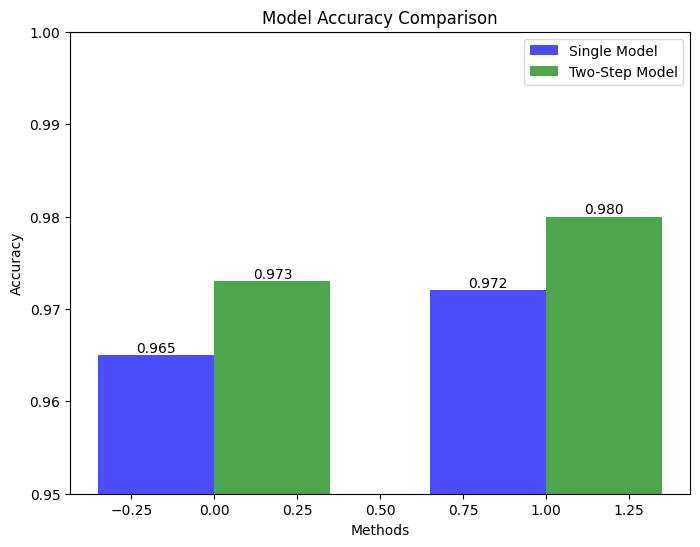

In [19]:


# Define the methods and their corresponding accuracy values
methods = ['Single Model', 'Two-Step Model']
accuracy_values = [0.965, 0.972]  # Accuracy values for Single Model
accuracy_values_two_step = [0.973, 0.980]  # Accuracy values for Two-Step Model

# Create a bar chart with grouped bars
width = 0.35
x = range(len(methods))

plt.figure(figsize=(8, 6))
plt.bar([i - width/2 for i in x], accuracy_values, width=width, label='Single Model', color='b', alpha=0.7)
plt.bar([i + width/2 for i in x], accuracy_values_two_step, width=width, label='Two-Step Model', color='g', alpha=0.7)

plt.title('Model Accuracy Comparison')
plt.xlabel('Methods')
plt.ylabel('Accuracy')

plt.legend()
plt.ylim(0.95, 1.0)  # Adjust the y-axis limits if necessary

# Add labels to the bars
for i in range(len(methods)):
    plt.text(i - width/2, accuracy_values[i], f'{accuracy_values[i]:.3f}', ha='center', va='bottom')
    plt.text(i + width/2, accuracy_values_two_step[i], f'{accuracy_values_two_step[i]:.3f}', ha='center', va='bottom')

plt.show()


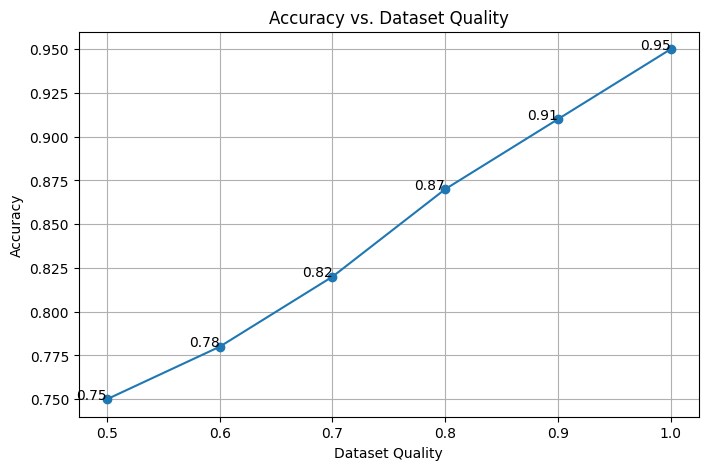

In [20]:
import matplotlib.pyplot as plt

# Define dataset quality levels and their corresponding accuracies
dataset_quality = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]  # Example dataset quality levels
accuracy = [0.75, 0.78, 0.82, 0.87, 0.91, 0.95]  # Example accuracy values

# Create a line graph
plt.figure(figsize=(8, 5))  # Set the figure size
plt.plot(dataset_quality, accuracy, marker='o', linestyle='-')
plt.title('Accuracy vs. Dataset Quality')
plt.xlabel('Dataset Quality')
plt.ylabel('Accuracy')
plt.grid(True)

# Add labels to the data points
for i in range(len(dataset_quality)):
    plt.text(dataset_quality[i], accuracy[i], f'{accuracy[i]:.2f}', ha='right')

plt.show()


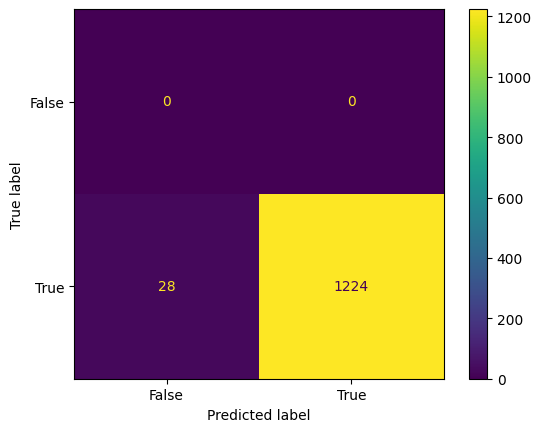

In [21]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = numpy.random.binomial(1,.9,size = 1000)
predicted = numpy.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(test_labels, pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [22]:
Accuracy = metrics.accuracy_score(test_labels, pred)
Precision = metrics.precision_score(test_labels, pred)
Sensitivity_recall = metrics.recall_score(test_labels, pred)
Specificity = metrics.recall_score(test_labels, pred, pos_label=0)
F1_score = metrics.f1_score(test_labels, pred)

#metrics
print("Accuracy : ",Accuracy)
print("Precision : ",Precision)
print("Sensitivity_recall : ",Sensitivity_recall)
print("Specificity : ",Specificity)
print("F1_score",F1_score)
print("\n\n\n")

Accuracy :  0.9776357827476039
Precision :  1.0
Sensitivity_recall :  0.9776357827476039
Specificity :  0.0
F1_score 0.9886914378029079






/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
